In [34]:
# libraries
import glob
import mne
mne.set_log_level('WARNING') # turning off verbose so loadbar is updated in-place
from mne import grand_average
from tqdm import tqdm

In [35]:
# get epoch filepaths
epo_files = sorted(glob.glob(f"epochs/*.fif"))

# get fwd models filepaths
fwd_files = sorted(glob.glob(f"models/*.fif"))

epo_files, fwd_files

(['epochs/0163-epo.fif',
  'epochs/0164-epo.fif',
  'epochs/0165-epo.fif',
  'epochs/0166-epo.fif',
  'epochs/0167-epo.fif',
  'epochs/0168-epo.fif',
  'epochs/0169-epo.fif',
  'epochs/0170-epo.fif'],
 ['models/0163-fwd.fif',
  'models/0164-fwd.fif',
  'models/0165-fwd.fif',
  'models/0166-fwd.fif',
  'models/0167-fwd.fif',
  'models/0168-fwd.fif',
  'models/0169-fwd.fif',
  'models/0170-fwd.fif'])

In [36]:
# function for creating averages (evoked responses) and difference waves
def compute_evoked_diff(epochs):
    evokeds = list()
    for event in epochs.event_id:
        evokeds.append(epochs[event].average())

    diffs = [(2,0)] # PAS 1-3 contrast
    for diff in diffs:
        evoked_diff = evokeds[diff[0]].copy() # create a copy
        evoked_diff.data -= evokeds[diff[1]].data # modify the data in place
    
    return evoked_diff

  0%|          | 0/8 [00:00<?, ?it/s]

Loaded epochs/0163-epo.fif and models/0163-fwd.fif


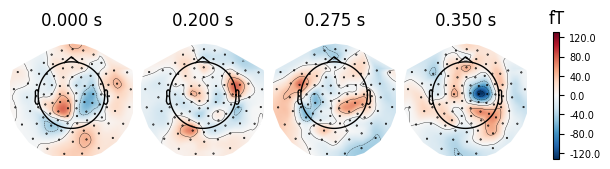

 12%|█▎        | 1/8 [00:06<00:45,  6.44s/it]

Loaded epochs/0164-epo.fif and models/0164-fwd.fif


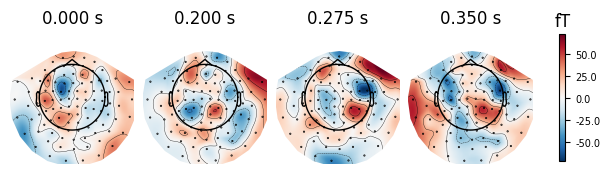

 25%|██▌       | 2/8 [00:13<00:39,  6.66s/it]

Loaded epochs/0165-epo.fif and models/0165-fwd.fif


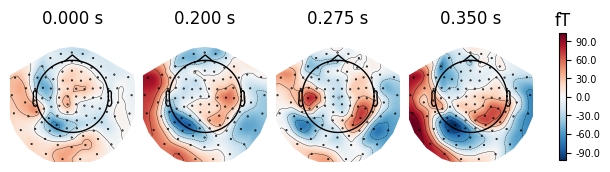

 38%|███▊      | 3/8 [00:20<00:33,  6.76s/it]

Loaded epochs/0166-epo.fif and models/0166-fwd.fif


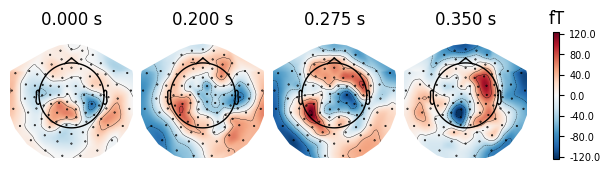

 50%|█████     | 4/8 [00:26<00:26,  6.73s/it]

Loaded epochs/0167-epo.fif and models/0167-fwd.fif


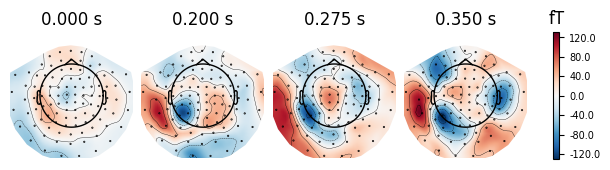

 62%|██████▎   | 5/8 [00:32<00:19,  6.39s/it]

Loaded epochs/0168-epo.fif and models/0168-fwd.fif


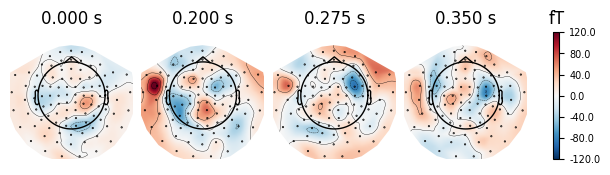

 75%|███████▌  | 6/8 [00:39<00:13,  6.64s/it]

Loaded epochs/0169-epo.fif and models/0169-fwd.fif


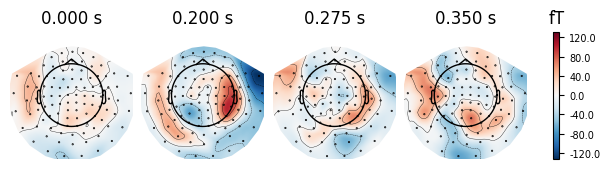

 88%|████████▊ | 7/8 [00:45<00:06,  6.42s/it]

Loaded epochs/0170-epo.fif and models/0170-fwd.fif


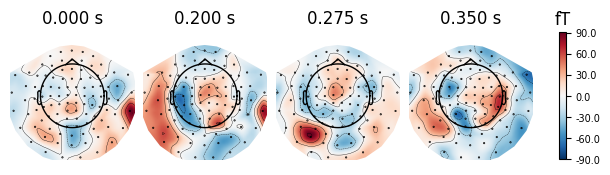

100%|██████████| 8/8 [00:52<00:00,  6.59s/it]


In [38]:
epochs_group = []
fwds_group = []
evoked_diffs = []

# for each subject
for epo_file, fwd_file in tqdm(zip(epo_files, fwd_files), total=len(epo_files)):

    # load epochs and fwd model
    epochs = mne.read_epochs(epo_file)
    fwd = mne.read_forward_solution(fwd_file)

    # compute difference wave
    evoked_diff = compute_evoked_diff(epochs)

    # store in group lists
    epochs_group.append(epochs)
    fwds_group.append(fwd)
    evoked_diffs.append(evoked_diff)

    # do stuff for each participant
    print(f"Loaded {epo_file} and {fwd_file}")
    fig = mne.viz.plot_evoked_topomap(evoked_diff, times=[0, 0.2, 0.275, 0.35])

In [ ]:
# access each subjects epochs
epochs_group[0] # first participant

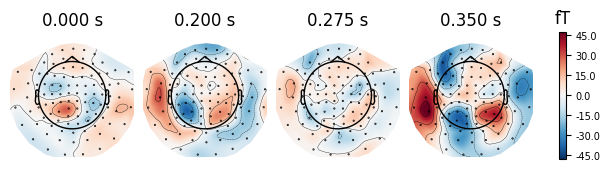

Text(0.5, 0.98, 'Group-level ACE–NE difference')

In [40]:
# compute group average
grand_avg = grand_average(evoked_diffs)

# plot
fig = mne.viz.plot_evoked_topomap(grand_avg, times=[0, 0.2, 0.275, 0.35])
fig.suptitle('Group-level ACE–NE difference', fontsize=16)